In [1]:
import torch
import numpy as np
import pandas as pd
import os
import sys
import cv2
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from skimage.metrics import structural_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import asyncio
import glob
import shutil
from collections import Counter,defaultdict
import wave
import librosa
import librosa.display
import pywt
import base64
sns.set_style("darkgrid")

In [2]:
data_path = r'data/AudioData/raw_image'

In [75]:
re.split(r'[/\\]', data_path)

['data', 'AudioData', 'raw_image']

In [3]:
# for o in os.listdir(old_path):
#     if re.match(r'.*WAV', o):
#         shutil.copyfile(os.path.join(old_path, o), os.path.join(data_path, o))

In [4]:
test_wav = 'voice_1656313210_43_61_1660016072031.WAV'
x, sr = librosa.load(os.path.join(data_path, test_wav), sr=None)

In [5]:
# wav to base64
# enc = base64.b64encode(open(os.path.join(data_path, test_wav), "rb").read())
# enc_str = str(enc, 'utf-8')
# wav_file = open("temp.wav", "wb")
# decode_string = base64.b64decode(enc_str)
# wav_file.write(decode_string)

In [6]:
# with open('temp.txt', 'w') as f:
#     f.write(enc_str)

In [7]:
# x, sr = librosa.load("temp.wav", sr=None)

In [27]:
sr

8000

In [8]:
x.shape

(240000,)

In [9]:
time_x = np.array([i / sr for i in np.arange(len(x))])

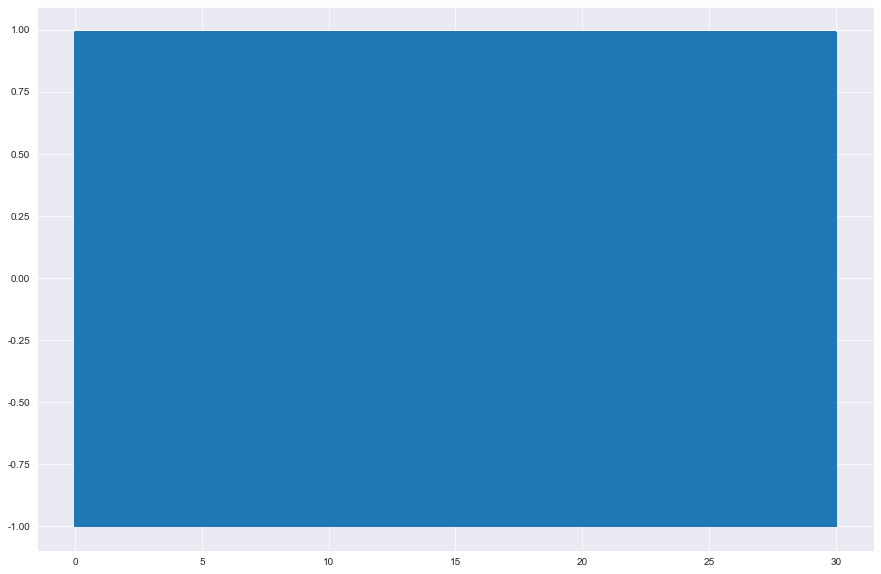

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(time_x, x)

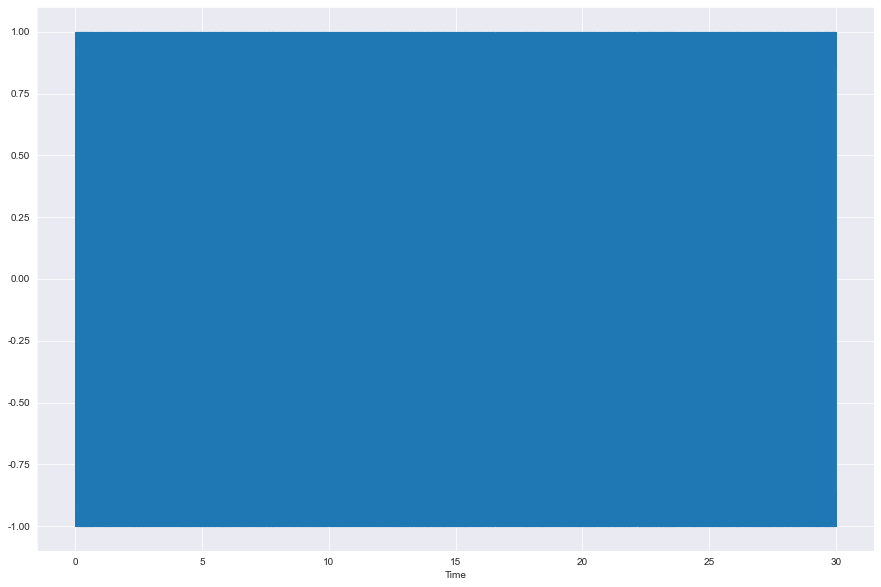

In [11]:
plt.figure(figsize=(15, 10))
librosa.display.waveshow(x, sr=sr)

In [33]:
n_fft=2048
win_length=n_fft
hop_length=win_length // 2

/var/folders/yr/f0mm0hx1513d2q2m3qr8q7pw0000gn/T/ipykernel_54073/3893609762.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(format="%+2.0f dB")


Text(0.5, 1.0, 'STFT transform processing audio signal to spectrogram')

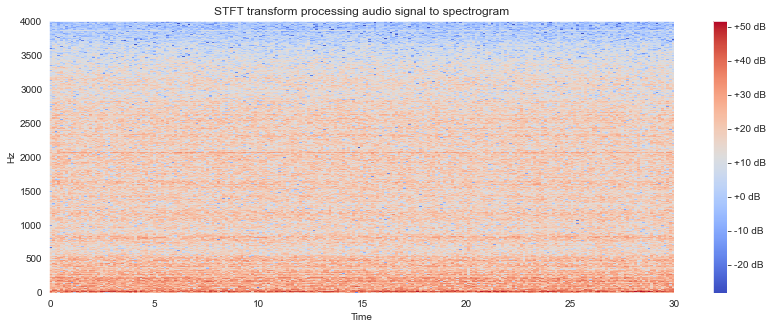

In [34]:
# STFT处理绘制声谱图spectrogram
X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
Xdb = librosa.amplitude_to_db(abs(X))  # X--二维数组数据

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title('STFT transform processing audio signal to spectrogram')

In [35]:
Xdb.shape

(1025, 235)

In [36]:
x.shape[0] / hop_length

234.375

In [37]:
xdb = [[float(f'{y:.4f}') for y in x] for x in Xdb]

In [38]:
f_list = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

In [39]:
f_list.shape

(1025,)

In [40]:
# get time
total_points = Xdb.shape[1] * hop_length
total_time = total_points / sr
total_time

30.08

In [41]:
total_points

240640

In [42]:
hop_length

1024

In [43]:
idx_arr = librosa.frames_to_samples(np.arange(Xdb.shape[1]), hop_length=hop_length)
idx_arr.shape

(235,)

In [44]:
time_arr = np.array([i / total_points * total_time for i in idx_arr])

In [45]:
time_arr.shape

(235,)

In [46]:
# 画热力图
# 组成dataframe
df_stft = pd.DataFrame(Xdb, index=f_list, columns=time_arr)

Text(0.5, 1.0, 'STFT transform processing audio signal')

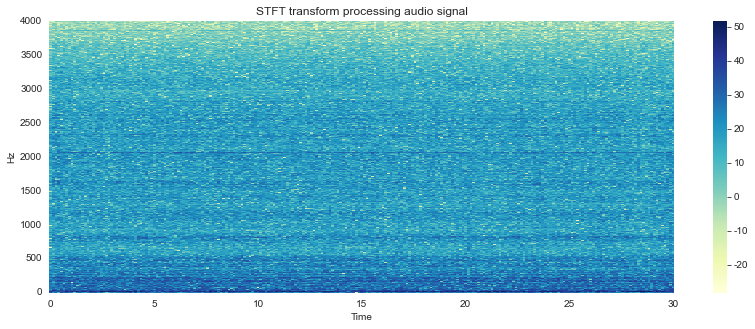

In [47]:
plt.figure(figsize=(14, 5))
xlabel_interval = df_stft.shape[1] // 6
ylabel_interval = df_stft.shape[0] // 8
ax = sns.heatmap(df_stft, cmap='YlGnBu', xticklabels=xlabel_interval, yticklabels=ylabel_interval)
ax.invert_yaxis()
ax.set_xticklabels([f'{float(i.get_text()):.0f}' for i in ax.get_xticklabels()])
ax.set_yticklabels([f'{float(i.get_text()):.0f}' for i in ax.get_yticklabels()], rotation=0)
ax.set_xlabel('Time')
ax.set_ylabel('Hz')
plt.title('STFT transform processing audio signal') # or ax.set_title('STFT transform processing audio signal')

In [61]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40, hop_length=1024, window='hamming')

In [62]:
mfccs.shape

(40, 235)